# Respondendo as perguntas do CEO

In [69]:
# importação do pandas
import pandas as pd

# conversão da notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# carregamento do arquivo
data = pd.read_csv('datasets/kc_house_data.csv')

In [61]:
# 01. Qual o número de imóveis por ano de construção?
# contar o numero de ids por ano de construção
data[['id', 'yr_built']].groupby('yr_built').count().reset_index()

yr_built   id
0        1900   87
1        1901   29
2        1902   27
3        1903   46
4        1904   45
..        ...  ...
111      2011  130
112      2012  170
113      2013  201
114      2014  559
115      2015   38

[116 rows x 2 columns]

In [63]:
# 02. Qual o menor número de quartos por ano de construção de imóveis?
# filtrar todos os imóveis por ano de construção e selecionar o menor número de quartos
data[['bedrooms','yr_built']].groupby('yr_built').min().reset_index()

yr_built  bedrooms
0        1900         1
1        1901         2
2        1902         2
3        1903         1
4        1904         2
..        ...       ...
111      2011         1
112      2012         2
113      2013         2
114      2014         1
115      2015         1

[116 rows x 2 columns]

In [66]:
# 3. Qual o preço de compra mais alto por cada número de quarto?
# Filtrar todos os imóveis por número de quarto e selecionar o de maior preço
data[['price','bedrooms']].groupby('bedrooms').max().reset_index()

bedrooms      price
0          0 1295650.00
1          1 1247000.00
2          2 3278000.00
3          3 3800000.00
4          4 4489000.00
5          5 7062500.00
6          6 7700000.00
7          7 3200000.00
8          8 3300000.00
9          9 1400000.00
10        10 1148000.00
11        11  520000.00
12        33  640000.00

In [70]:
## 04. Qual a soma de todos os preços de compra por número de quartos?
# Filtrar todos os imóveis por número de quartos e somar todos os preços
data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

bedrooms         price
0          0    5323550.00
1          1   63210934.00
2          2 1107788602.00
3          3 4580263939.00
4          4 4372957028.00
5          5 1259346326.00
6          6  224541613.00
7          7   36145017.00
8          8   14366000.00
9          9    5363999.00
10        10    2458000.00
11        11     520000.00
12        33     640000.00

In [71]:
## 05. Qual a soma de todos os preços de compra por número de quartos e banheiros?
# Filtrar todos os imóveis por número de quartos e por número de banheiros e realizar a soma de todos os preços
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms','bathrooms']).sum().reset_index()

bedrooms  bathrooms      price
0           0       0.00 3642600.00
1           0       0.75  265000.00
2           0       1.00  228000.00
3           0       1.50  288000.00
4           0       2.50  899950.00
..        ...        ...        ...
139        10       2.00  650000.00
140        10       3.00  660000.00
141        10       5.25 1148000.00
142        11       3.00  520000.00
143        33       1.75  640000.00

[144 rows x 3 columns]

In [72]:
## 06. Qual o tamanho médio das salas dos imóveis por ano de construção?
# Filtrar todos os imóveis por ano de construção e fazer a média do tamanho das salas
data[['sqft_living', 'yr_built']].groupby('yr_built').mean().reset_index()

yr_built  sqft_living
0        1900      1732.01
1        1901      1763.62
2        1902      1919.63
3        1903      1507.74
4        1904      1603.18
..        ...          ...
111      2011      2313.68
112      2012      2378.74
113      2013      2636.59
114      2014      2615.39
115      2015      2596.32

[116 rows x 2 columns]

In [73]:
## 07. Qual o tamanho mediano das salas dos imóveis por ano de construção?
# Filtrar todos os imóveis por ano de construção e fazer a mediana do tamanho da salas
data[['sqft_living', 'yr_built']].groupby('yr_built').median().reset_index()

yr_built  sqft_living
0        1900      1540.00
1        1901      1610.00
2        1902      1600.00
3        1903      1505.00
4        1904      1280.00
..        ...          ...
111      2011      2270.00
112      2012      2237.50
113      2013      2580.00
114      2014      2650.00
115      2015      2590.00

[116 rows x 2 columns]

In [74]:
# 08. Qual é o desvio-padrão do tamanho das salas dos imóveis por ano de construção?
# Filtrar todos os imóveis por ano de construção e fazer o desvio-padrão do tamanho das salas
data[['sqft_living', 'yr_built']].groupby('yr_built').std().reset_index()

yr_built  sqft_living
0        1900       732.94
1        1901       668.23
2        1902       878.66
3        1903       469.72
4        1904      1076.87
..        ...          ...
111      2011       804.86
112      2012       771.43
113      2013       883.50
114      2014       893.81
115      2015      1155.61

[116 rows x 2 columns]

In [17]:
# 09. Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?
# Filtrar todos os anos e fazer um gráfico onde o eixo x eu tenha o ano e o eixo y eu tenha a média do preço ano
# Estudar um biblioteca que tenha alguma função que desenhe um gráfico de linhas

<BarContainer object of 2 artists>

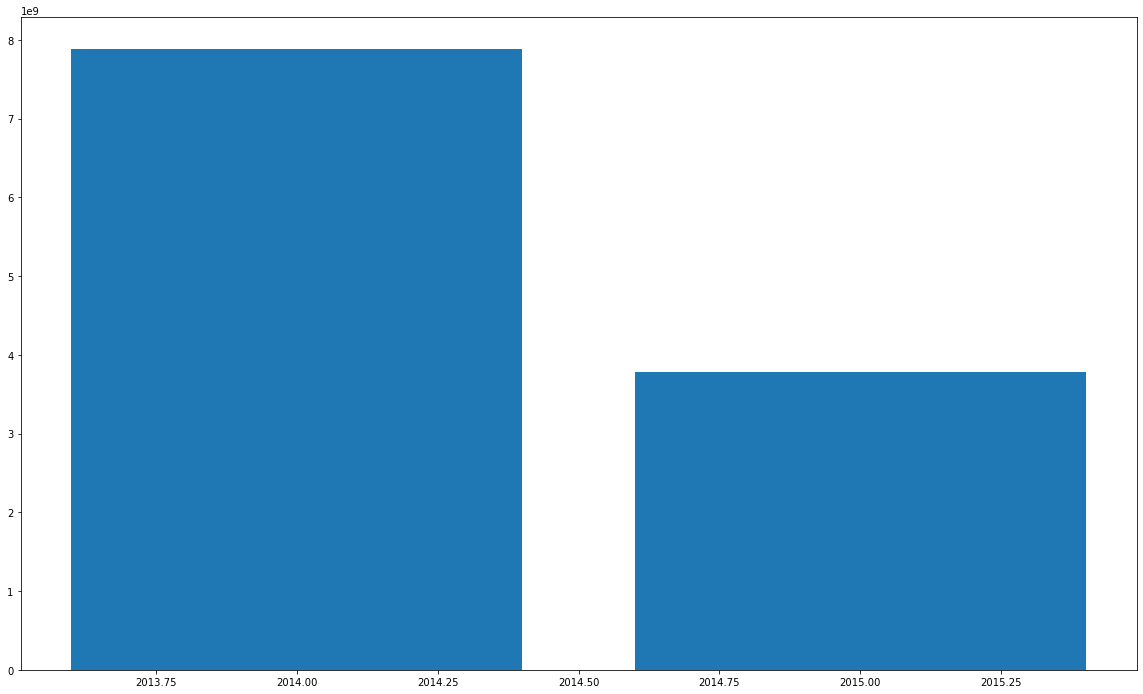

In [112]:
# 09.1 First Graph
# Crescimento total de preços de compras dos imóveis por ano.
# Eixo x: anos
# Eixo y: soma dos preços
# Gráfico: Barras

from matplotlib import pyplot as plt

data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price','year']].groupby('year').sum().reset_index()

plt.figure( figsize = (20, 12) )
plt.bar( by_year['year'], by_year['price'] )

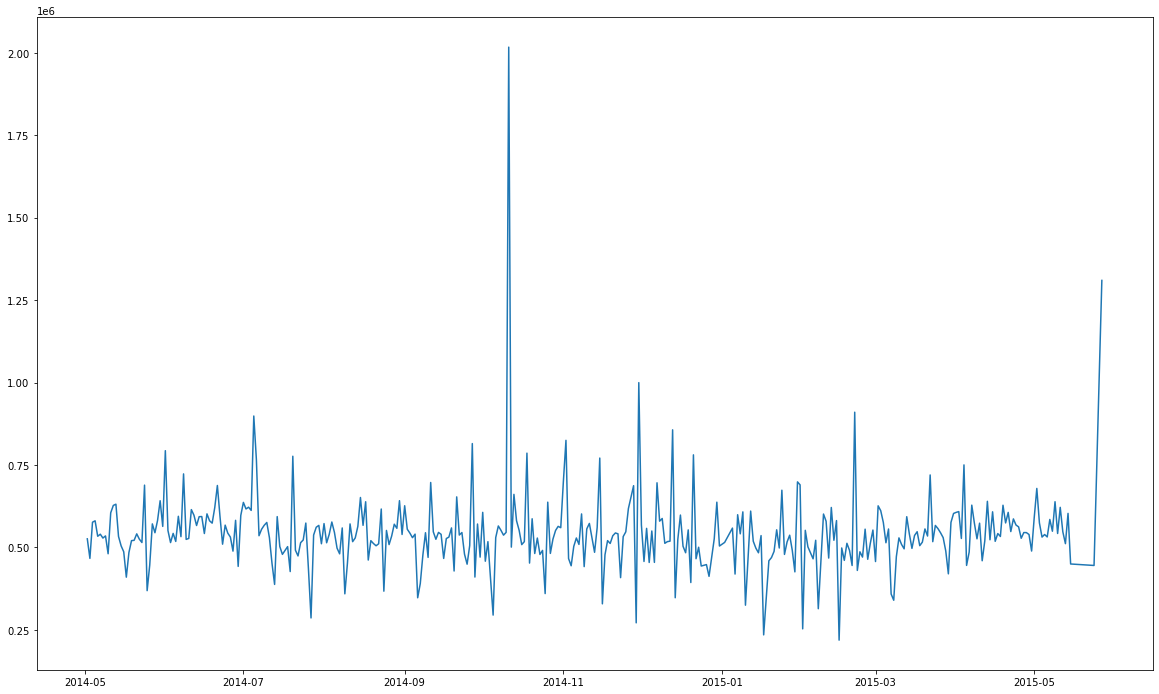

In [76]:
# 09.2 Second graph
data['day'] = pd.to_datetime( data[ 'date' ])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()

plt.figure(figsize=(20, 12))
plt.plot(by_day['day'], by_day['price'])

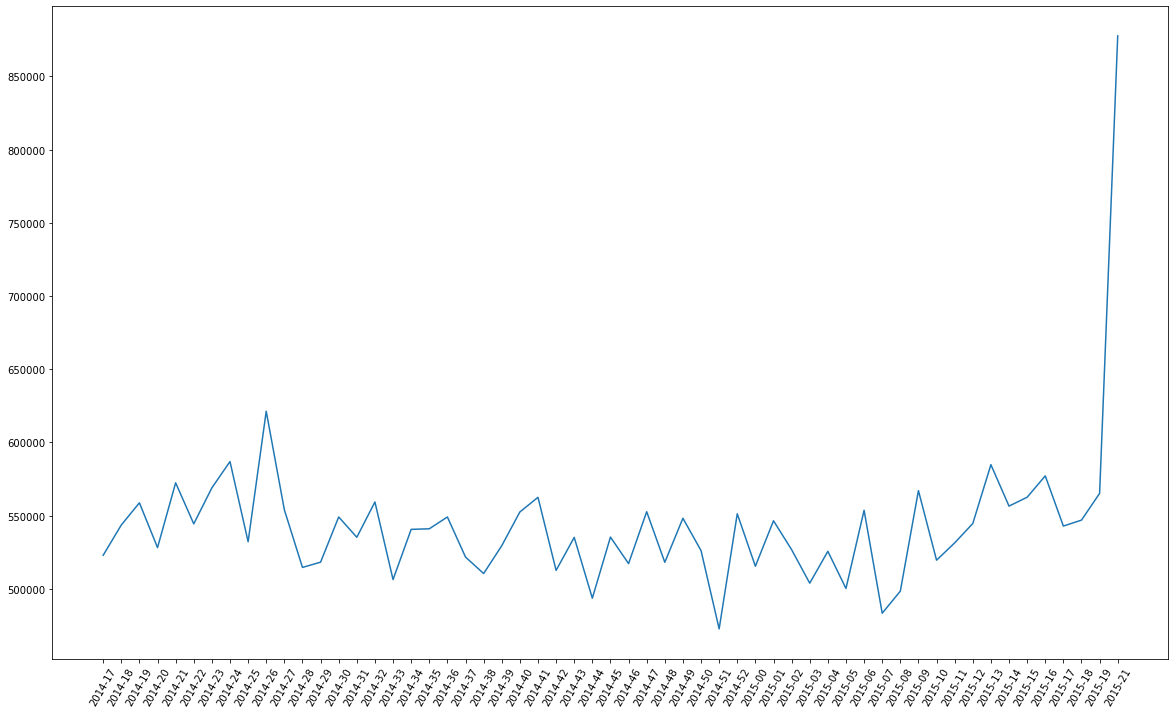

In [77]:
# Third graph
data['year_week'] = pd.to_datetime( data[ 'date' ] ).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

plt.figure( figsize=(20,12 ) )
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

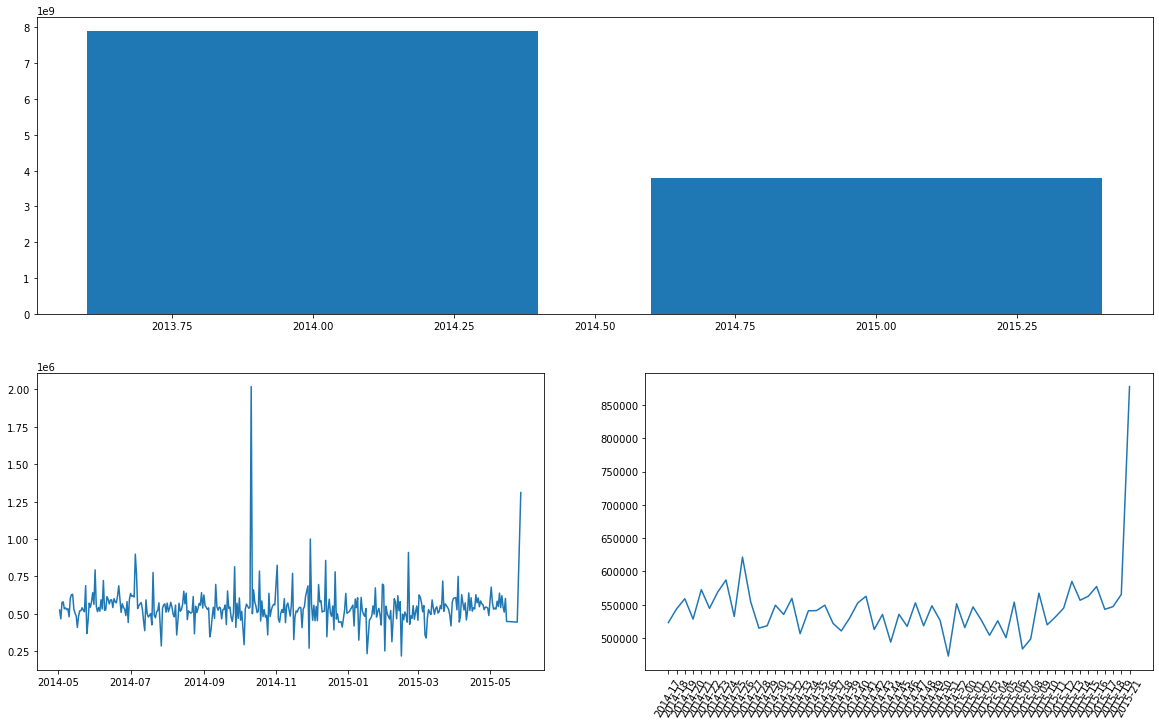

In [78]:
# Graphs (Dashbord 9.0)
from matplotlib import gridspec


fig = plt.figure(figsize=( 20,12 ) )
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :]) # frirst Row
ax2 = fig.add_subplot( specs[1, 0]) # second Rows - First Column
ax3 = fig.add_subplot( specs[1, 1]) #Second Rows - Second Column

# First graph
data['year'] = pd.to_datetime(data['date']).dt.year
bay_year = data[['price','year']].groupby('year').sum().reset_index()
ax1.bar( bay_year['year'], bay_year['price'] )

# Second graph
data['day'] = pd.to_datetime( data[ 'date' ])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()
ax2.plot(by_day['day'], by_day['price'])

# Third graph
data['year_week'] = pd.to_datetime( data[ 'date' ] ).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

In [128]:
# 10- Gostaria de olhar no mapa e conseguir identificar as casas com o maior preço
# Modificar o mapa da aula anterior fazendo com que os pontos sendo proporcional ao preço 
import plotly.express as px

houses = data[['id','lat','long','price']]

fig = px.scatter_mapbox(houses,
                       lat = 'lat',
                       lon ='long',
                       size = 'price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r': 0, 't' :0, 'l' :0,'b' :0} )

fig.show()

# Novas perguntas do CEO

In [105]:
# 1. Crie uma nova coluna chamada: “dormitory_type”
    #- Se o valor da coluna “bedrooms” for igual a 1 => ‘studio’
    #- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartment’
    #- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
    
data['dormitory_type'] = 'standard'

data.loc[data['bedrooms'] == 1, 'dormitory_type' ] = 'studio' 
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'

          price  bedrooms
0      75000.00         1
1      78000.00         2
2      80000.00         1
3      81000.00         2
4      82000.00         3
...         ...       ...
4023 5350000.00         5
4024 5570000.00         5
4025 6885000.00         6
4026 7062500.00         5
4027 7700000.00         6

[4028 rows x 2 columns]


<BarContainer object of 13 artists>

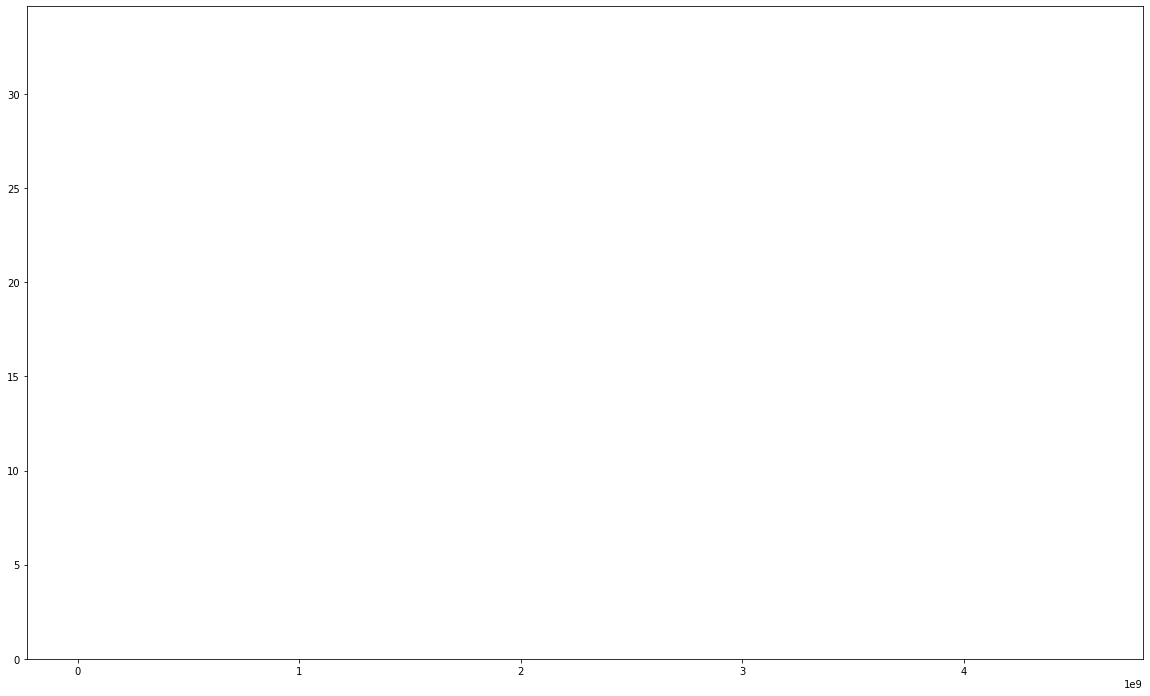

In [113]:
# Refazer
# 2. Faça um grafico de barras que represente a soma dos preços pelo número de quartos

# Crescimento médio de preços de compras dos imóveis por ano.
# Eixo x: soma dos preços
# Eixo y: número de quartos
# Gráfico: Barras

from matplotlib import pyplot as plt

by_price = data[['bedrooms','price']].groupby('bedrooms').sum().reset_index()
print(bay_price)
plt.figure( figsize = (20, 12) )
#                    x                y
plt.bar( by_price['price'], by_price['bedrooms'] )

In [114]:
# Refazer
# 3. Faca um grafico de linhas que represente a media dos precos pelo ano de contrucao dos imoveis

by_price = data[['yr_built','price']].groupby('yr_built').mean().reset_index()

plt.figure( figsize = (20, 12) )
#                    x                y
plt.bar( bay_price['yr_built'], bay_price['price'] )

KeyError: 'yr_built'

<Figure size 1440x864 with 0 Axes>

<BarContainer object of 4 artists>

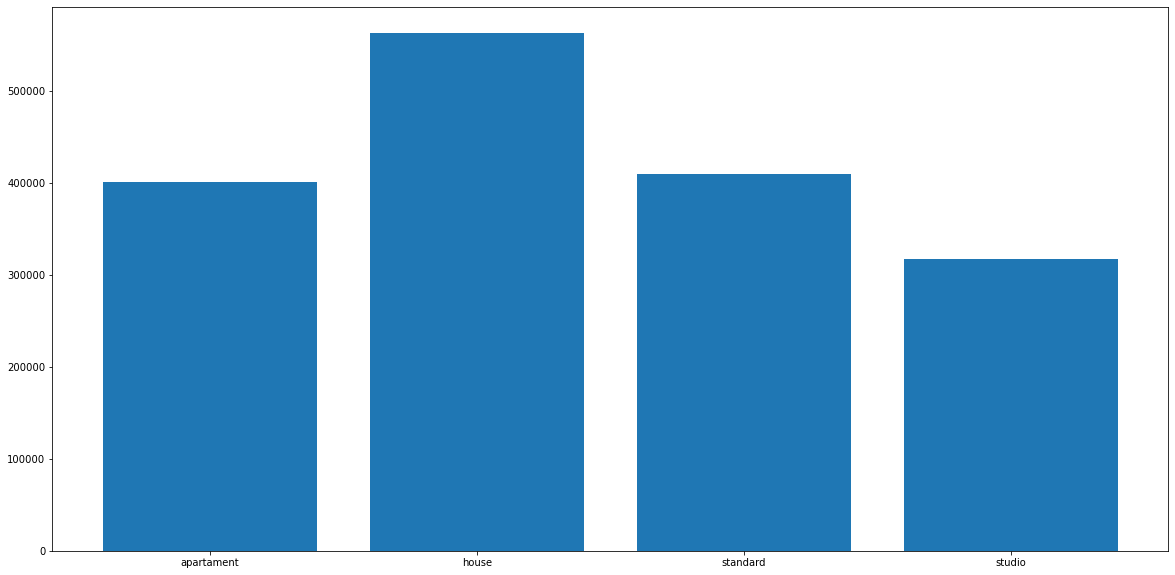

In [115]:
# 4. Faca um grafico de barras que represente a media dos precos pelo tipo de dormitorio

#pegar a coluna 'price' e 'dormitory_type'
                                                                    # fazer a média 
bay_dormitory = data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index()

#Graph
plt.figure(figsize=(20,10))
plt.bar(bay_dormitory['dormitory_type'], bay_dormitory['price'])

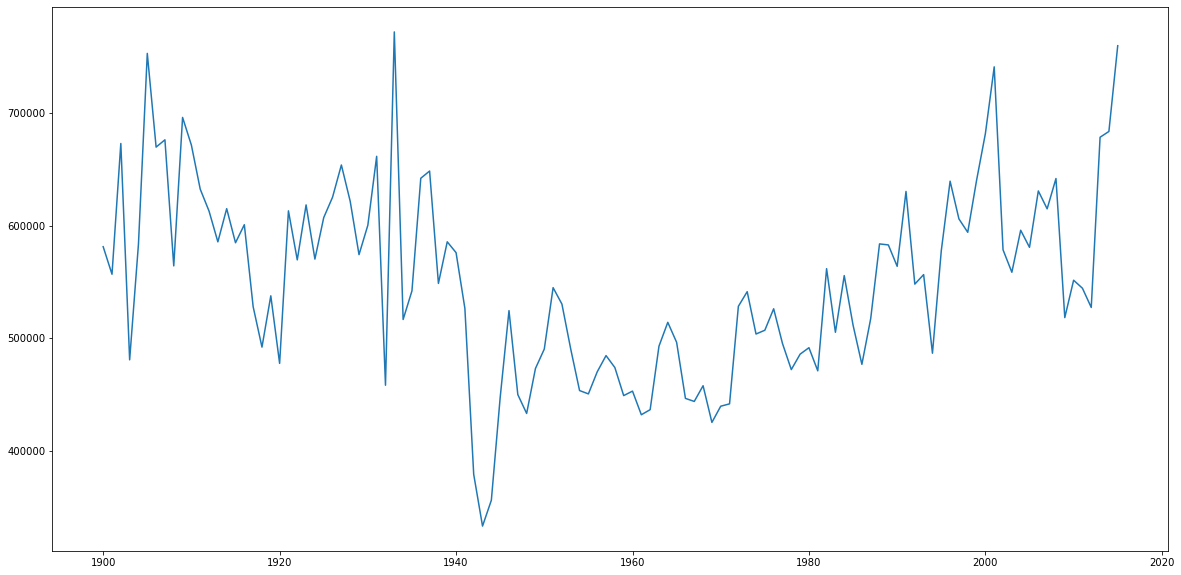

In [64]:
# Refazer
# 5. Faca um grafico de linhas que mostre a evolucao da media dos precos pelo ano da reforma dos imoveis, a partir do ano de 1930

# Gráfico de linhas
# colunas: 'price' e 'yr_built'

bay_yr_built = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(20, 10))
plt.plot(bay_yr_built['yr_built'], bay_yr_built['price'])

In [68]:
# 6. Faca uma tabela que mostre a media dos precos por ano de construcao e tipo de dormitorios dos imoveis
# colunas : price , yr_built , dormitory_type

data[['price','yr_built','dormitory_type']].groupby('dormitory_type').mean().reset_index()

dormitory_type     price  yr_built
0     apartament 401372.68   1955.41
1          house 563092.21   1973.61
2       standard 409503.85   1983.85
3         studio 317642.88   1942.66

<BarContainer object of 4 artists>

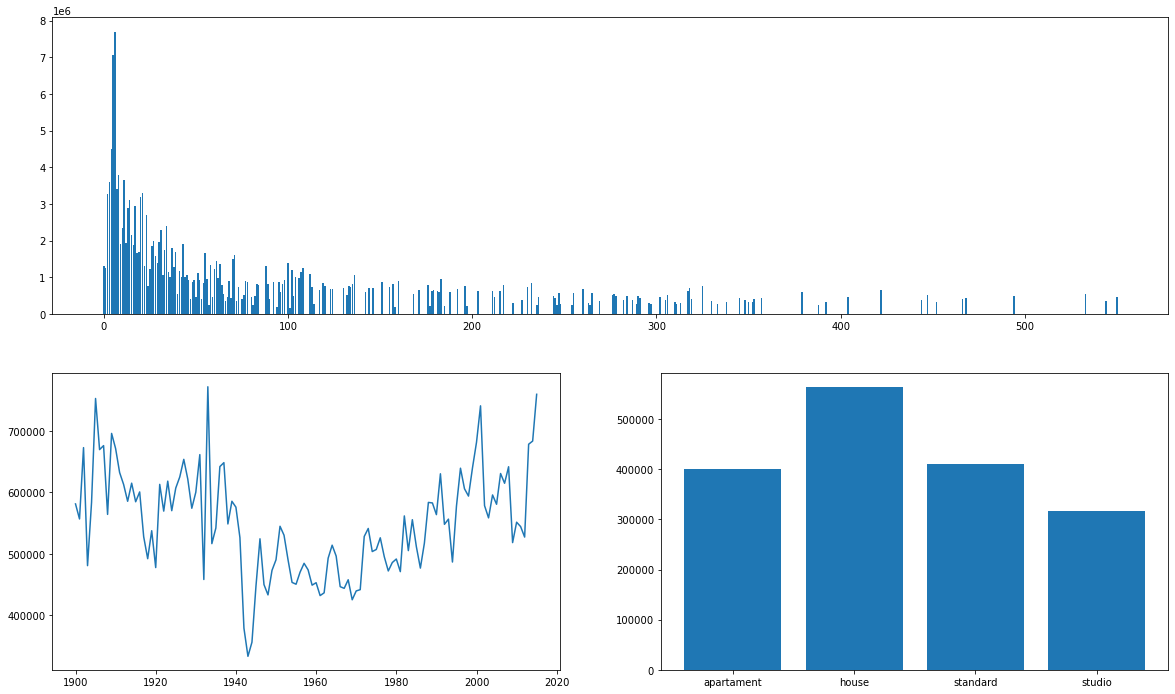

In [59]:
# colocar as modificações
# 7. Crie um dashboard com os graficos das questoes 2, 3 e 4 ( Dashboard: 1 linha e 2 colunas)

fig = plt.figure(figsize=( 20,12 ) )
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :]) # frirst Row
ax2 = fig.add_subplot( specs[1, 0]) # second Rows - First Column
ax3 = fig.add_subplot( specs[1, 1]) #Second Rows - Second Column

# First graph
bay_price = data[['bedrooms','price']].groupby('price').sum().reset_index()
ax1.bar( bay_price['bedrooms'], bay_price['price'] )

# Second graph
bay_built = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax2.plot(bay_built['yr_built'], bay_built['price'])

# Third graph
bay_dormitory = data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index()
ax3.bar(bay_dormitory['dormitory_type'], bay_dormitory['price'])

<BarContainer object of 4 artists>

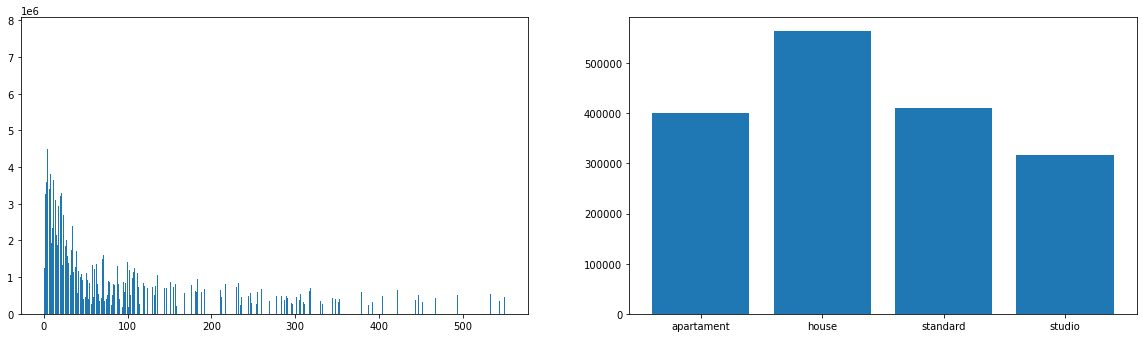

In [123]:
# 8. Crie um dashboard com os graficos das perguntas 2 e 4 ( Dashboard: 2 colunas)

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, 0])
ax2 = fig.add_subplot( specs[0, 1])

# Second Graph
by_price = data[['bedrooms','price']].groupby('price').sum().reset_index()
ax1.bar( by_price['bedrooms'], by_price['price'] )

# Fourth Graph
by_dormitory = data[['dormitory_type','price']].groupby('dormitory_type').mean().reset_index()
ax2.bar(by_dormitory['dormitory_type'], by_dormitory['price'])

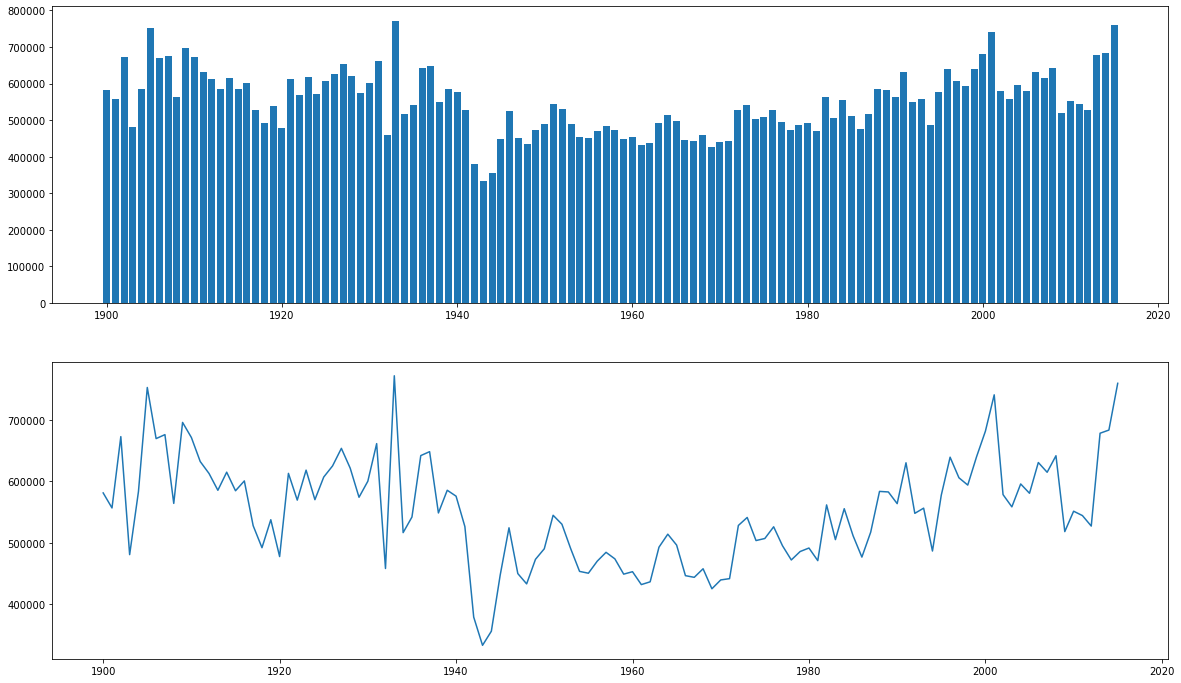

In [125]:
#9. Crie um dashboard com os graficos das perguntas 3 e 5 ( Dashboard: 2 linhas)

fig = plt.figure ( figsize=(20,12 ) )
specs = gridspec.GridSpec(ncols= 2, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, :])
ax2 = fig.add_subplot( specs[1, :])

# Third Graph
by_price = data[['yr_built','price']].groupby('yr_built').mean().reset_index()
ax1.bar( by_price['yr_built'], by_price['price'] )


#Fifth Graph
by_yr_built = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
ax2.plot(by_yr_built['yr_built'], by_yr_built['price'])

In [130]:
# 10. Faca um mapa com o tamanho dos pontos sendo igual ao tamanho da sala de estar
# tamanho: 'sqft_living'

houses = data[['id', 'lat', 'long', 'sqft_living']]

fig = px.scatter_mapbox(houses,
                       lat = 'lat',
                       lon = 'long',
                       size = 'sqft_living',
                       color_continuous_scale = px.colors.cyclical.IceFire,
                       size_max = 15,
                       zoom = 10)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r': 0, 't' :0, 'l' :0,'b' :0} )

fig.show()